# Initialisierung

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
previous_application = pd.read_csv(DATASET_DIR / "previous_application.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [38]:
description.loc[description['Table']=="previous_application.csv", "Row":"Special"]

,Row,Description,Special
176,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
177,SK_ID_CURR,ID of loan in our sample,hashed
178,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
179,AMT_ANNUITY,Annuity of previous application,NaN
180,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
181,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
182,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
183,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
184,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
185,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [23]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,Payback
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,Payback
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,Payback
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,Payback
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,Payback


In [4]:
# Function to draw a Piechart
def draw_piechart(arguments):
    
    fig, ax = plt.subplots(1,len(arguments))

    try:
    # Handle multiple plots
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
            
    # Handle single plot           
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
        
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    plt.show()

# Datenaufbereitung

In [6]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
previous_application = pd.merge(previous_application, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")


# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
previous_application["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)


# Unterteilung des Datensatzen nach Payback und Default
payback = previous_application[previous_application["TARGET"] == "Payback"]
default = previous_application[previous_application["TARGET"] == "Default"]

# Datenanalyse

## Contract Type

### Payback

Consumer loans     577049
Cash loans         569567
Revolving loans    144475
XNA                   250
Name: NAME_CONTRACT_TYPE, dtype: int64 



### Default

Cash loans         57197
Consumer loans     48207
Revolving loans    16893
XNA                   63
Name: NAME_CONTRACT_TYPE, dtype: int64 



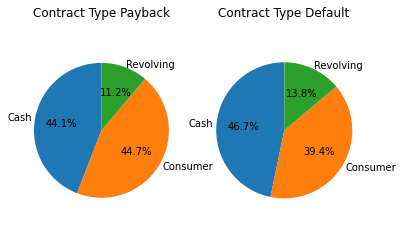

In [7]:
COLUMN_NAME = "NAME_CONTRACT_TYPE"
TITLE = "Contract Type"
LABELS = ["Cash", "Consumer", "Revolving"]
SIZES_PER = lambda x : x / N

count = payback[COLUMN_NAME].value_counts()

N = len(payback[COLUMN_NAME])

cash = count["Cash loans"]
cons = count["Consumer loans"]
rev = count["Revolving loans"]
SIZES = [cash, cons, rev]

labels1 = LABELS
sizes1 = [SIZES_PER(element) for element in SIZES]
title1 = TITLE + " Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default[COLUMN_NAME].value_counts()

N = len(default[COLUMN_NAME])

cash = count["Cash loans"]
cons = count["Consumer loans"]
rev = count["Revolving loans"]
SIZES = [cash, cons, rev]

labels2 = LABELS
sizes2 = [SIZES_PER(element) for element in SIZES]
title2 = TITLE + " Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)

Zurückzahlende Kreditnehmer nahmen am häugifsten Konsumentenkredite in Anspruch.

Ausfallende Kreditnehmer nahmen am häufigsten einen Cash Kredit in Anspruch.

## ausgestellte Kredithöhe

In [8]:
display(Markdown("### Payback"))
print(payback["AMT_CREDIT"].mean(), "\n")

display(Markdown("### Default"))
print(default["AMT_CREDIT"].mean())

### Payback

196585.22609255035 



### Default

193914.70263204994


## Vorauszahlung

In [14]:
payback[payback["AMT_DOWN_PAYMENT"] > 0]["AMT_DOWN_PAYMENT"].mean()

12743.986101435055

In [15]:
default[default["AMT_DOWN_PAYMENT"] > 0]["AMT_DOWN_PAYMENT"].mean()

11045.187740415335

## Vertragsstatus

### Payback

Approved        818856
Canceled        235641
Refused         215952
Unused offer     20892
Name: NAME_CONTRACT_STATUS, dtype: int64 



### Default

Approved        67243
Refused         29438
Canceled        23800
Unused offer     1879
Name: NAME_CONTRACT_STATUS, dtype: int64 



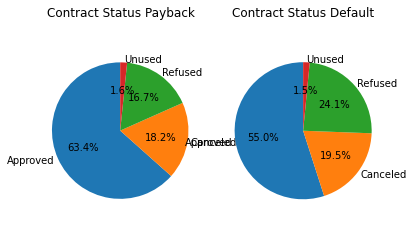

In [23]:
COLUMN_NAME = "NAME_CONTRACT_STATUS"
TITLE = "Contract Status"
LABELS = ["Approved", "Canceled", "Refused", "Unused"]
SIZES_PER = lambda x : x / N

count = payback[COLUMN_NAME].value_counts()

N = len(payback[COLUMN_NAME])

app = count["Approved"]
can = count["Canceled"]
ref = count["Refused"]
us = count["Unused offer"]
SIZES = [app, can, ref, us]

labels1 = LABELS
sizes1 = [SIZES_PER(element) for element in SIZES]
title1 = TITLE + " Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default[COLUMN_NAME].value_counts()

N = len(default[COLUMN_NAME])

app = count["Approved"]
can = count["Canceled"]
ref = count["Refused"]
us = count["Unused offer"]
SIZES = [app, can, ref, us]

labels2 = LABELS
sizes2 = [SIZES_PER(element) for element in SIZES]
title2 = TITLE + " Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)

## Kundentyp

### Payback

Repeater     947252
New          236195
Refreshed    106504
XNA            1390
Name: NAME_CLIENT_TYPE, dtype: int64 



### Default

Repeater     90430
New          23345
Refreshed     8432
XNA            153
Name: NAME_CLIENT_TYPE, dtype: int64 



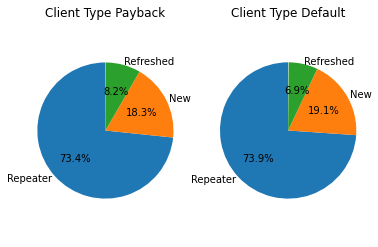

In [34]:
COLUMN_NAME = "NAME_CLIENT_TYPE"
TITLE = "Client Type"
LABELS = ["Repeater", "New", "Refreshed"]
SIZES_PER = lambda x : x / N

count = payback[COLUMN_NAME].value_counts()

N = len(payback[COLUMN_NAME])

app = count["Repeater"]
can = count["New"]
ref = count["Refreshed"]
SIZES = [app, can, ref]

labels1 = LABELS
sizes1 = [SIZES_PER(element) for element in SIZES]
title1 = TITLE + " Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default[COLUMN_NAME].value_counts()

N = len(default[COLUMN_NAME])

app = count["Repeater"]
can = count["New"]
ref = count["Refreshed"]
SIZES = [app, can, ref]

labels2 = LABELS
sizes2 = [SIZES_PER(element) for element in SIZES]
title2 = TITLE + " Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)

## Portfolio

### Payback

POS      547220
Cash     356897
XNA      277276
Cards    109589
Cars        359
Name: NAME_PORTFOLIO, dtype: int64 



### Default

POS      45240
Cash     34766
XNA      29937
Cards    12396
Cars        21
Name: NAME_PORTFOLIO, dtype: int64 



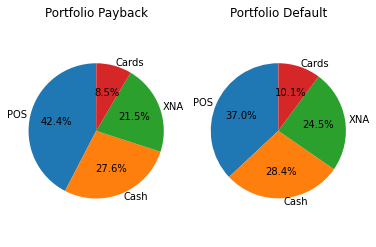

In [42]:
COLUMN_NAME = "NAME_PORTFOLIO"
TITLE = "Portfolio"
LABELS = ["POS", "Cash", "XNA", "Cards"]
SIZES_PER = lambda x : x / N

count = payback[COLUMN_NAME].value_counts()

N = len(payback[COLUMN_NAME])

a = count["POS"]
b = count["Cash"]
c = count["XNA"]
d = count["Cards"]
SIZES = [a, b, c, d]

labels1 = LABELS
sizes1 = [SIZES_PER(element) for element in SIZES]
title1 = TITLE + " Payback"

display(Markdown("### Payback"))
print(count, "\n")

count = default[COLUMN_NAME].value_counts()

N = len(default[COLUMN_NAME])

a = count["POS"]
b = count["Cash"]
c = count["XNA"]
d = count["Cards"]
SIZES = [a, b, c, d]

labels2 = LABELS
sizes2 = [SIZES_PER(element) for element in SIZES]
title2 = TITLE + " Default"

display(Markdown("### Default"))
print(count, "\n")

arguments = [(labels1, sizes1, title1), (labels2, sizes2, title2)]

draw_piechart(arguments)